In [1]:
import pandas as pd
#  /content/FanDuel_Data/ProjectDataset.csv

# Read the can file into a Pandas DataFrame
df1 = pd.read_csv("/content/FanDuel_Data/ProjectDataset.csv")

# Print the DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   state         1048575 non-null  object 
 1   playerid      1048575 non-null  float64
 2   wagerid       1048575 non-null  float64
 3   event_start   1048575 non-null  object 
 4   placed_date   1048575 non-null  object 
 5   settled_date  1048575 non-null  object 
 6   sportname     1048575 non-null  object 
 7   bet_type      1048575 non-null  object 
 8   result        1048575 non-null  object 
 9   net_stake     1048575 non-null  float64
 10  ggr           1048575 non-null  float64
 11  legresult     1048575 non-null  object 
 12  decimalodds   1048569 non-null  float64
dtypes: float64(5), object(8)
memory usage: 104.0+ MB


In [2]:
df1

,state,playerid,wagerid,event_start,placed_date,settled_date,sportname,bet_type,result,net_stake,ggr,legresult,decimalodds
0,State1,30651211.80,1.693004e+06,2021-04-28 00:30:00+00,4/27/21,4/27/21,nhl,straight,won,6.64,-4.96,won,1.74627
1,State1,22237170.91,1.696371e+06,2021-04-28 01:45:00+00,4/27/21,4/27/21,nba,parlay,lost,5.00,5.00,won,1.78125
2,State1,22237170.91,1.696371e+06,2021-04-28 01:45:00+00,4/27/21,4/27/21,nba,parlay,lost,5.00,5.00,lost,1.86207
3,State1,22237170.91,1.696371e+06,2021-04-28 01:45:00+00,4/27/21,4/27/21,nba,parlay,lost,5.00,5.00,lost,1.74627
4,State1,22237170.91,1.696371e+06,2021-04-28 01:45:00+00,4/27/21,4/27/21,nba,parlay,lost,5.00,5.00,lost,1.78125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,State3,20520826.33,2.425001e+07,2021-10-02 01:27:00+00,10/1/21,10/1/21,college football,parlay,lost,100.00,100.00,won,1.28169
1048571,State3,20520826.33,2.425009e+07,2021-10-02 01:27:00+00,10/1/21,10/1/21,college football,parlay,lost,50.00,50.00,won,1.28169
1048572,State3,20520826.33,2.425009e+07,2021-10-02 00:27:00+00,10/1/21,10/1/21,college football,parlay,lost,50.00,50.00,lost,1.86957
1048573,State1,22245057.45,2.425012e+07,2021-10-27 00:10:00+00,10/26/21,10/27/21,mlb,parlay,lost,37.50,37.50,won,1.69444


In [3]:
# Calculate the Pearson correlation coefficient between net_stake and ggr
# df["correlation_coefficient"] = df["net_stake"].corr(df["ggr"])
# df.head(3)


In [4]:
# Get the unique sport names
unique_sport_names = df1["sportname"].unique()

# Print out the unique sport names
for sport_name in unique_sport_names:
    print(sport_name)


nhl
nba
mlb
champions league
nfl
college football
college basketball


In [5]:
# returns a dataframe of combined wagers, meaning each leg of parlay is combined
df2=df1
# Group the dataframe by playerID and wagerID
df2 = df2.groupby(["playerid", "wagerid"]).agg({"net_stake": "mean", "ggr": "mean", "legresult": "first", "event_start": "min", "placed_date": "min", "sportname": "first", "bet_type": "first"}).reset_index()



In [6]:
unique_playerid = df1["playerid"].unique()
unique_playerid = len(unique_playerid)
print((f"Number of Unique Users {unique_playerid}\n"))

num_parlay_bets = (df2['bet_type'] == 'parlay').sum()
num_straight_bets = (df2['bet_type'] == 'straight').sum()

# print the results
print(f'Number of parlay bets: {num_parlay_bets}')
print(f'Number of straight bets: {num_straight_bets}')
# for player in unique_playerid:
#   print(player)

Number of Unique Users 20549

Number of parlay bets: 167596
Number of straight bets: 472072


In [7]:
# Analysis the overall net_stake and ggr by bet_type

grouped_df = df2.groupby("bet_type")

# Calculate the averages of GGR and net_stakes for each type of Bet(parlay and straight)
average_ggr_by_bet_type = grouped_df["ggr"].mean()
average_net_stakes_by_bet_type = grouped_df["net_stake"].mean()

# Print the results
print("\nAverage GGR by bet_type \n")
print(average_ggr_by_bet_type)

print("\nAverage net stakes by bet_type \n")
print(average_net_stakes_by_bet_type)


Average GGR by bet_type 

bet_type
parlay      2.373514
straight    2.359405
Name: ggr, dtype: float64

Average net stakes by bet_type 

bet_type
parlay      14.256620
straight    34.362024
Name: net_stake, dtype: float64


In [8]:
# count the frequency of each playerid in the dataframe
df=df2
player_counts = df.groupby('playerid').size()

# count the number of players who bet more than once
num_multiple_bets = (player_counts > 1).sum()

# calculate the total GGR and net_stake
total_ggr = df['ggr'].sum()
total_net_stake = df['net_stake'].sum()

# calculate the GGR and net_stake generated by users who bet more than once
multiple_bets_df = df.groupby('playerid').filter(lambda x: len(x) > 1)
multiple_bets_ggr = multiple_bets_df['ggr'].sum()
multiple_bets_net_stake = multiple_bets_df['net_stake'].sum()

# calculate the percentage of overall GGR and net_stake generated by users who bet more than once
ggr_percentage = multiple_bets_ggr / total_ggr * 100
net_stake_percentage = multiple_bets_net_stake / total_net_stake * 100

# print the results
print("Percentage of overall GGR generated by users who bet more than once: {:.2f}%".format(ggr_percentage))
print("Percentage of overall net stake generated by users who bet more than once: {:.2f}%".format(net_stake_percentage))


Percentage of overall GGR generated by users who bet more than once: 98.30%
Percentage of overall net stake generated by users who bet more than once: 99.38%


In [9]:
# Get the number of bets for each bet type
df=df1
number_of_parlay_bets = len(df[df["bet_type"] == "parlay"])
number_of_straight_bets = len(df[df["bet_type"] == "straight"])

# Calculate the winnings for each bet type
parlay_winnings = average_ggr_by_bet_type["parlay"] * number_of_parlay_bets
straight_winnings = average_ggr_by_bet_type["straight"] * number_of_straight_bets

# Calculate the total winnings
total_winnings = parlay_winnings + straight_winnings

print("Total Parlay winnings: $", parlay_winnings)
print("Total straight winnings: $", straight_winnings)

percent_difference = (parlay_winnings / straight_winnings * 100)-100
print(f"\nParlay bet Winnings are {percent_difference}% larger than Straight bet Winnings")


grouped_df = df2.groupby("bet_type")

# Calculate the averages of GGR and net_stakes for each type of Bet(parlay and straight)
# average_ggr_by_bet_type = grouped_df["ggr"].mean()
# # percent_difference_ggr = (
# print(f"\n Parlay ggr is {percent_difference}% larger than straight bet ggr")


Total Parlay winnings: $ 1368337.9186911597
Total straight winnings: $ 1113808.968638

Parlay bet Winnings are 22.85211891985442% larger than Straight bet Winnings


In [10]:
grouped_df = df2.groupby("playerid")

# Calculate the total ggr and net_stakes for each playerid
total_ggr = grouped_df["ggr"].sum()
total_net_stakes = grouped_df["net_stake"].sum()

# Create a new DataFrame with the total ggr and net_stakes for each user
new_df8 = pd.DataFrame({"players": grouped_df.groups.keys(), "total_ggr": total_ggr, "total_net_stakes": total_net_stakes})

# Print the new DataFrame
new_df8

,players,total_ggr,total_net_stakes
playerid,,,
5.971640e+04,5.971640e+04,288.909713,1112.369043
7.136435e+04,7.136435e+04,-1136.545845,7040.299987
7.247948e+04,7.247948e+04,-23.170000,30.580000
9.317920e+04,9.317920e+04,142.241664,1198.166662
9.774864e+04,9.774864e+04,22.500000,22.500000
...,...,...,...
4.294054e+07,4.294054e+07,191.366666,1576.666666
4.294843e+07,4.294843e+07,30.000000,30.000000
4.295593e+07,4.295593e+07,20.600000,20.600000


In [11]:
# df2

In [12]:
df=df2

df['placed_date'] = pd.to_datetime(df['placed_date'], format='%m/%d/%y')
df = df.sort_values(['playerid', 'placed_date'])
# print(df)

# get the first bet for each player
first_bets = df.groupby('playerid').first()

# get the last bet for each player
last_bets = df.groupby('playerid').last()

results = pd.DataFrame()

# determine if each player won their first bet
results['first_bet_won'] = (first_bets['legresult'] == 'won')

results['placed_second_bet'] = (last_bets['wagerid'] != first_bets['wagerid'])

# determine if each player placed another bet after winning their first
results['placed_second_bet_after_win'] = (last_bets['wagerid'] != first_bets['wagerid']) & (first_bets['legresult'] == 'won')

# compute the percentage of players who won their first bet and never placed another bet
no_second_bet_percentage = (results['first_bet_won'] & ~results['placed_second_bet']).mean()

# compute the percentage of players who won their first bet and placed another bet
second_bet_percentage = (results['first_bet_won'] & results['placed_second_bet_after_win']).mean()

# print the results
print("Percentage of players who won their first bet and never placed another bet: {:.2%}".format(no_second_bet_percentage))
print("Percentage of players who won their first bet and placed another bet: {:.2%}".format(second_bet_percentage))


Percentage of players who won their first bet and never placed another bet: 5.38%
Percentage of players who won their first bet and placed another bet: 36.49%


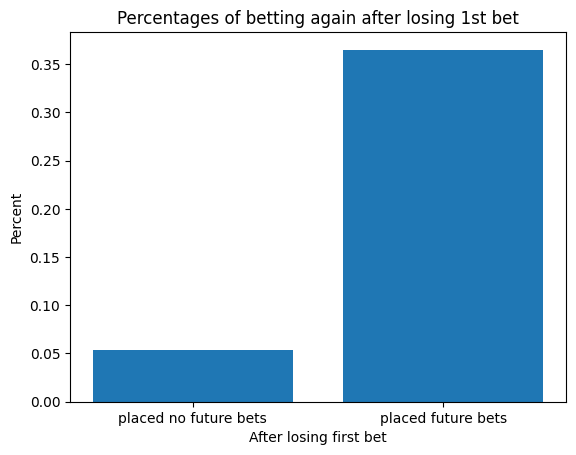

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# define the criteria and their values
criteria = ['placed no future bets', 'placed future bets']
values = [no_second_bet_percentage,second_bet_percentage ] # example values, replace with your own
# 
# create a bar chart
plt.bar(criteria, values)

# add labels to the chart
plt.xlabel('After losing first bet')
plt.ylabel('Percent')
plt.title('Percentages of betting again after losing 1st bet')

# display the chart
plt.show()

In [14]:
df=df2
# sort by player and placed_date
# get the first bet for each player
df['placed_date'] = pd.to_datetime(df['placed_date'], format='%m/%d/%y')
df = df.sort_values(['playerid', 'placed_date'])
# print(df)

first_bets = df.groupby('playerid').first()

# get the last bet for each player
last_bets = df.groupby('playerid').last()


# determine if each player lost their first bet
results['first_bet_lost'] = (first_bets['legresult'] == 'lost')

# determine if each player placed another bet after losing their first
results['placed_second_bet_after_loss'] = (last_bets['wagerid'] != first_bets['wagerid']) & (first_bets['legresult'] == 'lost')

# compute the percentage of players who lost their first bet and never placed another bet
no_second_bet_percentage = (results['first_bet_lost'] & ~results['placed_second_bet']).mean()

# compute the percentage of players who lost their first bet and placed another bet
second_bet_percentage = (results['first_bet_lost'] & results['placed_second_bet_after_loss']).mean()

# print the results
print("Percentage of players who lost their first bet and never placed another bet: {:.2%}".format(no_second_bet_percentage))
print("Percentage of players who lost their first bet and placed another bet: {:.2%}".format(second_bet_percentage))


Percentage of players who lost their first bet and never placed another bet: 9.56%
Percentage of players who lost their first bet and placed another bet: 47.92%


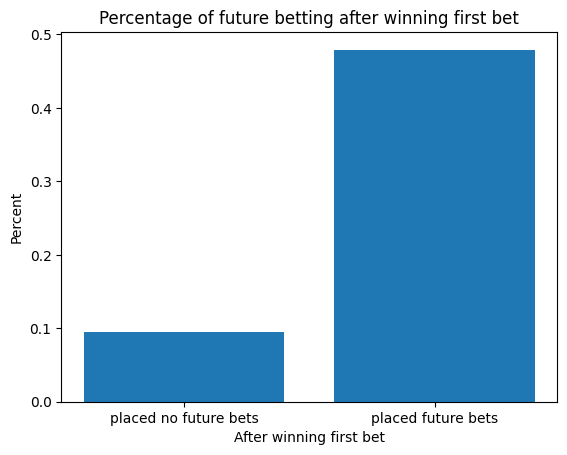

In [15]:
# define the criteria and their values
criteria = ['placed no future bets', 'placed future bets']
values = [no_second_bet_percentage,second_bet_percentage] # example values, replace with your own
# ,no_second_bet_percentage,second_bet_percentage
# create a bar chart
plt.bar(criteria, values)

# add labels to the chart
plt.xlabel('After winning first bet')
plt.ylabel('Percent')
plt.title('Percentage of future betting after winning first bet')

# display the chart
plt.show()

In [16]:
# get the frequency of each playerid in the dataframe
player_counts = df2.groupby('playerid').size()

# count the number of playerids that only appear once
num_single_bets = (player_counts == 1).sum()

# calculate the percentage of players that placed only one bet
single_bet_percentage = num_single_bets / len(player_counts)

# print the result
print("Percentage of players who placed only one bet: {:.2%}".format(single_bet_percentage))


Percentage of players who placed only one bet: 15.02%


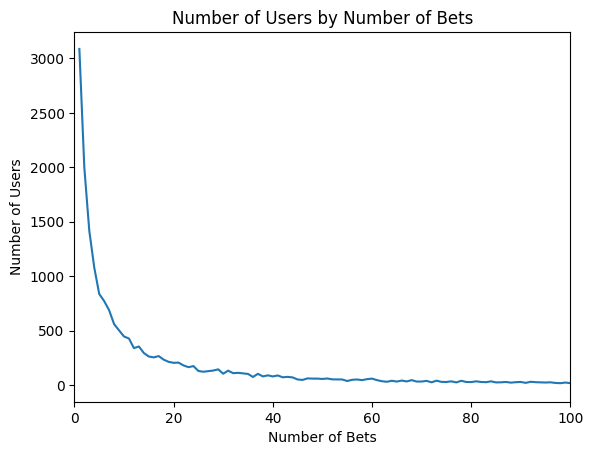

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df=df2
# count the number of bets made by each player
bet_counts = df['playerid'].value_counts()

# count the number of users for each distinct bet count
user_counts = bet_counts.value_counts()

# sort user_counts by index (which is the bet count)
user_counts = user_counts.sort_index()

# create a line graph of the user counts
plt.plot(user_counts.index, user_counts.values)

plt.xlim(0, 100)

# add labels and a title to the graph
plt.xlabel('Number of Bets')
plt.ylabel('Number of Users')
plt.title('Number of Users by Number of Bets')

# display the graph
plt.show()


In [18]:
# Create a new data frame for each sport
soccer = df[df["sportname"] == "champions league"]
mlb= df[df["sportname"] == "mlb"]
college_football=df[df["sportname"] == "college football"]
college_basketball=df[df["sportname"] == "college basketball"]
nhl_df = df[df["sportname"] == "nhl"]
nba_df = df[df["sportname"] == "nba"]
nfl_df = df[df["sportname"] == "nfl"]

# Print out the number of rows in each data frame, AKA total bets per sport
print(f"Number of rows in NHL data frame: {len(nhl_df)}")
print(f"Number of rows in NBA data frame: {len(nba_df)}")
print(f"Number of rows in NFL data frame: {len(nfl_df)}")
print(f"Number of rows in MLB data frame: {len(mlb)}")
print(f"Number of rows in College Basketballdata frame: {len(college_basketball)}")
print(f"Number of rows in College Football data frame: {len(college_football)}")
print(f"Number of rows in Champions League Data Frame: {len(soccer)}")


Number of rows in NHL data frame: 20278
Number of rows in NBA data frame: 128847
Number of rows in NFL data frame: 208157
Number of rows in MLB data frame: 186117
Number of rows in College Basketballdata frame: 20648
Number of rows in College Football data frame: 72424
Number of rows in Champions League Data Frame: 3197


In [19]:
# df2=df
import re
import datetime

# Create a regular expression to match the time of day
# regex = re.compile(r'(\d{2}:\d{2}:\d{2})')

# Extract the time of day from the event_start column
# df2['time_of_day'] = df2['event_start'].apply(lambda x: regex.search(x).group(1))

# Create a regular expression to match the date
regex = re.compile(r'(\d{4}-\d{2}-\d{2})')

# Extract the date from the event_start column
df2['date_started'] = df2['event_start'].apply(lambda x: regex.search(x).group(1))

regex = re.compile(r"(\d{4})-(\d{2})-(\d{2})")

df2["month_started"] = df2["date_started"].apply(lambda x: regex.search(x).group(2))

df2

,playerid,wagerid,net_stake,ggr,legresult,event_start,placed_date,sportname,bet_type,date_started,month_started
0,5.971640e+04,1.696743e+06,20.0,20.000,lost,2021-04-27 19:00:00+00,2021-04-27,champions league,straight,2021-04-27,04
1,5.971640e+04,2.457911e+06,30.0,-39.000,won,2021-05-04 19:00:00+00,2021-05-04,champions league,straight,2021-05-04,05
2,5.971640e+04,2.486567e+06,25.0,25.000,lost,2021-05-04 23:11:00+00,2021-05-04,mlb,straight,2021-05-04,05
3,5.971640e+04,2.802798e+06,25.0,25.000,lost,2021-05-07 23:06:00+00,2021-05-07,mlb,straight,2021-05-07,05
4,5.971640e+04,2.881311e+06,7.5,-12.135,won,2021-05-08 23:11:00+00,2021-05-08,nba,parlay,2021-05-08,05
...,...,...,...,...,...,...,...,...,...,...,...
639663,4.297671e+07,4.522434e+07,10.0,-18.400,won,2022-03-21 01:55:20+00,2022-03-20,college basketball,straight,2022-03-21,03
639664,4.297671e+07,4.609867e+07,25.0,25.000,lost,2022-03-25 02:08:02+00,2022-03-24,college basketball,straight,2022-03-25,03
639665,4.297671e+07,4.609883e+07,30.0,30.000,lost,2022-03-25 02:08:02+00,2022-03-24,college basketball,straight,2022-03-25,03
639666,4.297671e+07,4.609907e+07,20.0,20.000,lost,2022-03-25 02:08:02+00,2022-03-24,college basketball,straight,2022-03-25,03


09        5
03     1705
01     2788
02     2975
04     5069
10    12179
07    16873
12    18542
06    22088
05    23192
11    23431
Name: month_started, dtype: int64


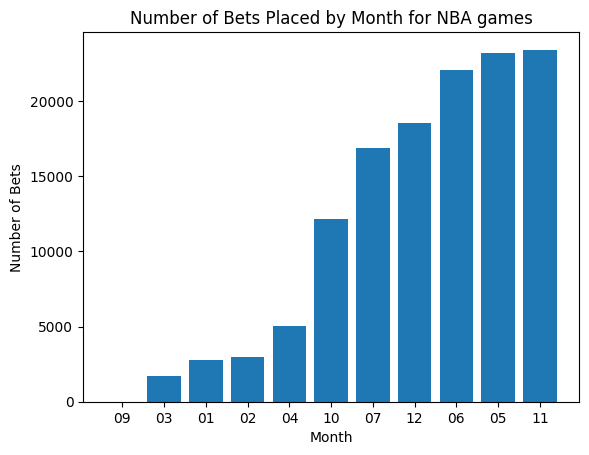

In [20]:
import matplotlib.pyplot as plt

new_df=df2
# Just focusing on NBA data here(I'm a basketball fan)
new_df = new_df[new_df["sportname"] == "nba"]

new_df= new_df.sort_values("date_started")

new_df["number_of_bets"] = new_df.groupby("month_started").size()

# Get the month column from the dataframe
month_column = new_df["month_started"]

# Count the number of bets placed in each month
month_counts = month_column.value_counts()

month_counts = month_counts.sort_values(ascending=True)

# Print the month counts
print(month_counts)

import matplotlib.pyplot as plt

plt.bar(month_counts.index, month_counts.values)

plt.xlabel("Month")
plt.ylabel("Number of Bets")

plt.title("Number of Bets Placed by Month for NBA games")

plt.show()

03      5689
04     10508
02     11226
01     12215
06     39565
05     41769
12     55508
07     58359
08     63583
11     86430
10    120214
09    134602
Name: month_started, dtype: int64


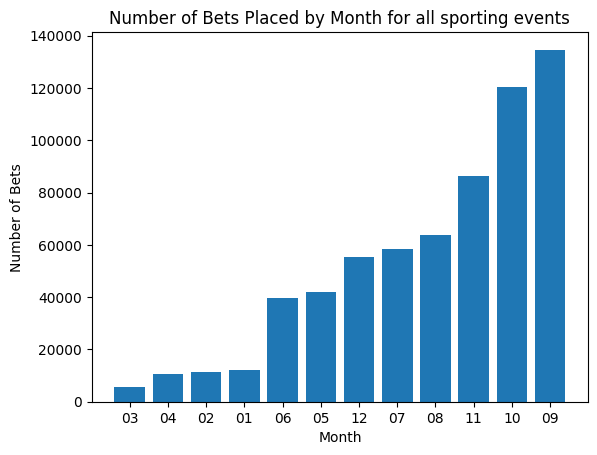

In [21]:
new_df=df2
new_df= new_df.sort_values("date_started")

new_df["number_of_bets"] = new_df.groupby("month_started").size()

# Get the month column from the dataframe
month_column = new_df["month_started"]

# Count the number of bets placed in each month
month_counts = month_column.value_counts()

month_counts = month_counts.sort_values(ascending=True)

# Print the month counts
print(month_counts)

import matplotlib.pyplot as plt

plt.bar(month_counts.index, month_counts.values)

plt.xlabel("Month")
plt.ylabel("Number of Bets")

plt.title("Number of Bets Placed by Month for all sporting events")

plt.show()

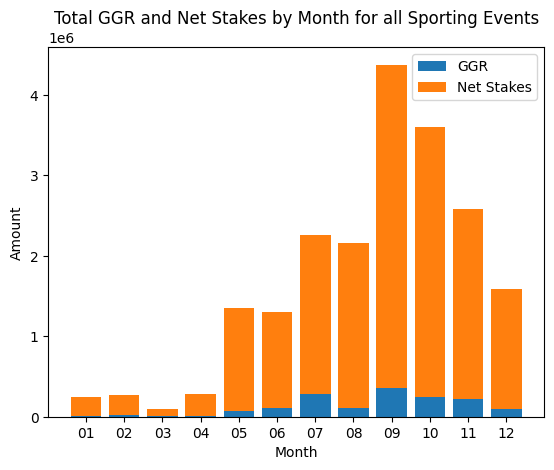

In [22]:
# group by month_started and sum the ggr and net_stakes
monthly_totals = new_df.groupby('month_started')[['ggr', 'net_stake']].sum()

# sort the values by month_started
monthly_totals = monthly_totals.sort_values('month_started')

# create a bar chart of the monthly totals
plt.bar(monthly_totals.index, monthly_totals['ggr'], label='GGR')
plt.bar(monthly_totals.index, monthly_totals['net_stake'], bottom=monthly_totals['ggr'], label='Net Stakes')

# add labels and a title to the chart
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Total GGR and Net Stakes by Month for all Sporting Events')

# add a legend to the chart
plt.legend()

# display the chart
plt.show()


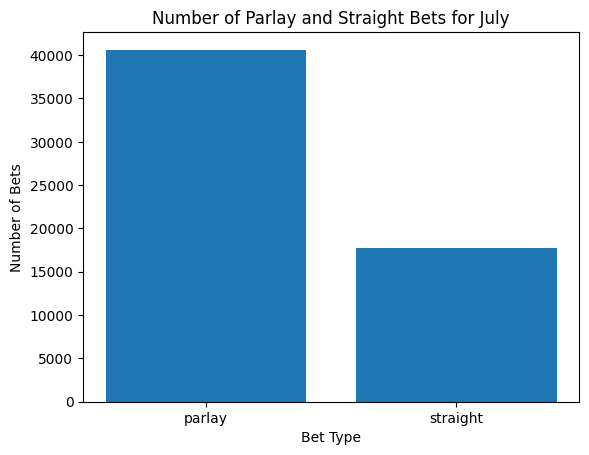

The sport with the most bets placed in July was mlb with 40486 bets


In [23]:
# filter the data to include only month 7
july_data = new_df[new_df['month_started'] == '07']
# count the number of parlay and straight bets
bet_counts = july_data['bet_type'].value_counts()

# create a bar chart of the bet counts
plt.bar(['parlay', 'straight'], bet_counts.values)

# add labels and a title to the chart
plt.xlabel('Bet Type')
plt.ylabel('Number of Bets')
plt.title('Number of Parlay and Straight Bets for July')

# display the chart
plt.show()

# determine the sport with the most bets placed
sport_counts = july_data['sportname'].value_counts()
top_sport = sport_counts.index[0]

# print the top sport
print(f"The sport with the most bets placed in July was {top_sport} with {sport_counts[0]} bets")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


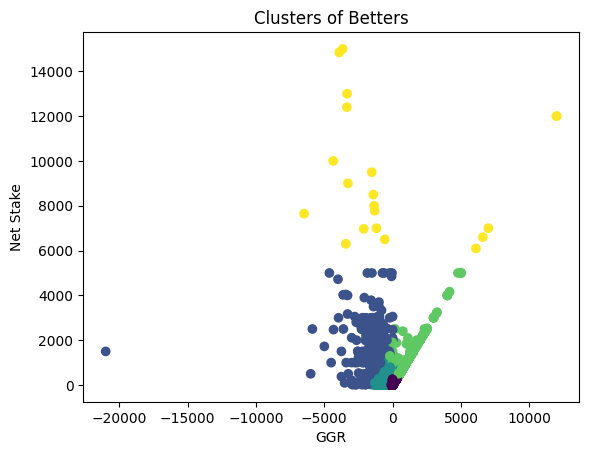

In [24]:
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 5
new_df2=new_df[["ggr","net_stake"]]
# Fit the clustering algorithm to the data
kmeans = KMeans(n_clusters=k)
kmeans.fit(new_df2)

# Predict the cluster membership of the data points
labels = kmeans.predict(new_df2)

# Visualize the clusters
plt.scatter(new_df2["ggr"], new_df2["net_stake"], c=labels)
plt.xlabel("GGR")
plt.ylabel("Net Stake")
plt.title("Clusters of Betters")
plt.show()